# Guided Project: Storytelling Data Visualization on Exchange Rate

This project explores the data of exchange rate to tell a story. 

*Is it going up? Is it going down? Is something happening in a certain year?* 

We can find it out by analyzing a data from Daria Chemakeva who posted a regularly updated data sourced from [European Central Bank](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020). The data used (on Dataquest) was downloaded at Jan 2021 so current downloads may give a difference.

Let's dive in, shall we?

In [1]:
import pandas as pd

# Read the dataset into a DataFrame (df)
exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')

# Check the data: df.head() and df.tail()
print(exchange_rates.head())
print(exchange_rates.tail())

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [2]:
# ^ Checks out. What about (2) df.info() ?
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

Here's what we get from the skim:
* There are 5699 rows x 40 columns of countries' currencies.
* However, at `info()`, most of the type are object and we can't operate them through `numpy` or `pandas` for convenience. 
* Also, there are null data in several columns, for instance `[Greek Drachma ]` with only 520 non-null data, `[Slovenian tolar ]` with 2085 non-null data, and the other 15.

## Data Cleaning

We can see several areas that needed a touch for convenience in analysis.
* The column names are not snake-case-friendly. e.g. `[US dollar ]`, `Period\Unit:`
* The data type of `Period\Unit:` is not `datetime`,
* The date is not in ascending order
* We can also reset the index (and drop the initial index)

Let's clean the data!

In [3]:
# Change the column names 
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar', 'Period\\Unit:': 'Time'}, inplace=True)
# NOTE: >>> # This has 2 '\' coz the character ignores the effect. (^) So we double it.

# Convert the first data type into `datetime`
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

# Sort the dates
exchange_rates.sort_values('Time', inplace=True)

# Reset the index
exchange_rates.reset_index(drop=True, inplace=True)

In [4]:
# Isolate `Time` and `US_dollar`
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts() # Check the data

## There are 62 '-' data. Drop it. Make a bool argument
# v Assign the DataFrame, NOT the Series.
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

# Change the type to `float`, see the `info()`.
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


## Data Visualization

Now we've cleaned the data, it's time to visualize the exchange rate to tell a story!

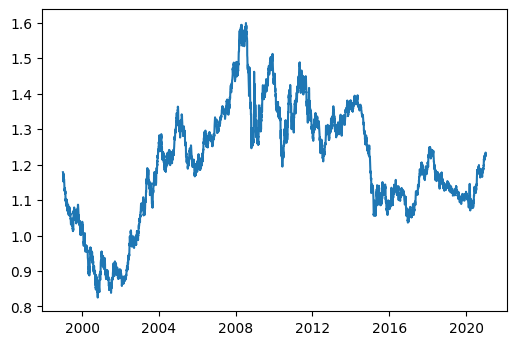

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 
# Enables Jupyter to display graphs

plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

### Rolling Mean -- Smoothen Out the Graph

We can use a built-in method called `rolling(n)`. It works by making an average between the data `i` and data `i+1` for n number of times. Here are the examples:

In [6]:
values = pd.DataFrame()
values['daily_values'] = pd.Series(range(1,20,2))
values

values['rolling_mean_2'] = values['daily_values'].rolling(2).mean()
values['rolling_mean_3'] = values['daily_values'].rolling(3).mean()
values['rolling_mean_4'] = values['daily_values'].rolling(4).mean()
values

,daily_values,rolling_mean_2,rolling_mean_3,rolling_mean_4
0,1,NaN,NaN,NaN
1,3,2.0,NaN,NaN
2,5,4.0,3.0,NaN
3,7,6.0,5.0,4.0
4,9,8.0,7.0,6.0
5,11,10.0,9.0,8.0
6,13,12.0,11.0,10.0
7,15,14.0,13.0,12.0
8,17,16.0,15.0,14.0
9,19,18.0,17.0,16.0


Now we can apply it to the `US_dollar`. We're comparing each rolling means using loops with value `rolling_mean = [7, 30, 50, 100, 365]`

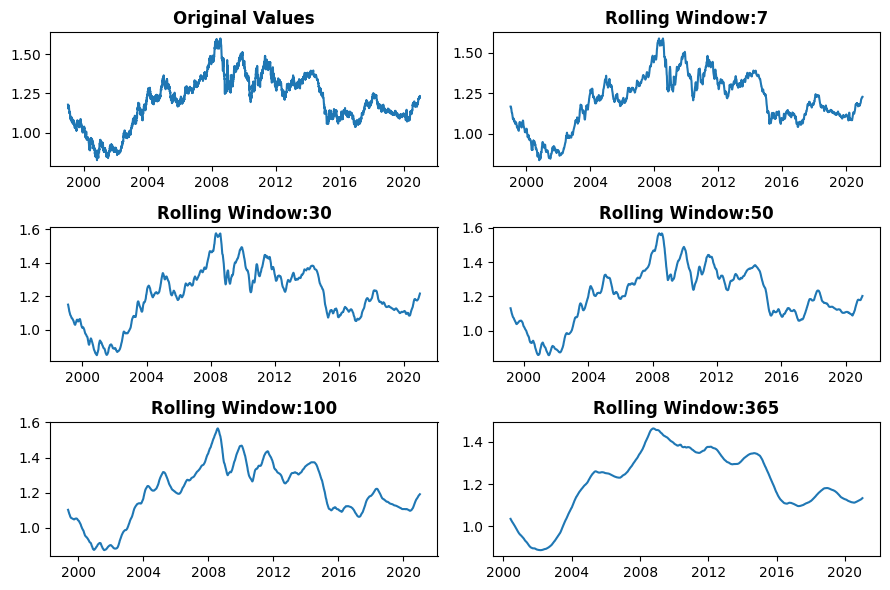

In [7]:
# Make six plots

plt.figure(figsize=(9, 6))

# First plot: ORIGINAL VALUES
plt.subplot(3, 2, 1)
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.title('Original Values', weight='bold')

# Other plots: ROLLING MEAN
## Use loops since you're rollin' it ooover and over.

for i, rolling_mean in (zip([2, 3, 4, 5, 6],
                            [7, 30, 50, 100, 365])):
    # Loop the placements at i
    plt.subplot(3, 2, i)
    
    # Roll it in baby
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

## Data Analysis

Let's look again at the smoothed graph:

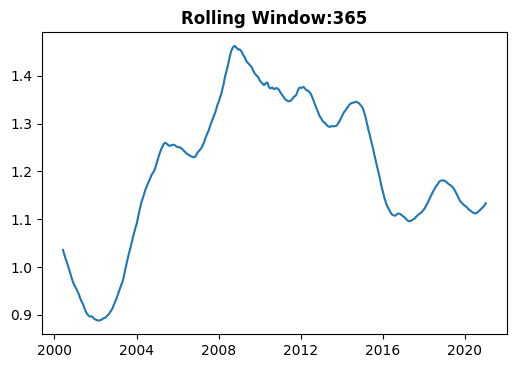

In [8]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'].rolling(365).mean())
plt.title('Rolling Window:365', weight='bold')
plt.show()

Here are a few story ideas for our data:

* We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.
* We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.
* We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

We can choose the third idea, since we could utilize more things on the sleeves. The steps will be all explained in the codes so we're learning as we go, one by one.

In [9]:
# Smoothen the plot: `rolling_mean` (30 times)
euro_to_dollar['rolling_mean'] = (euro_to_dollar['US_dollar'].
                                  rolling(30).mean())
euro_to_dollar['rolling_mean_365'] = (euro_to_dollar['US_dollar'].
                                      rolling(365).mean())

# What kind of data are you showing?
bush_obama_trump = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001) &
                     (euro_to_dollar['Time'].dt.year  < 2021)]

# Any data you want to segment?
bush  = bush_obama_trump.copy(
        )[bush_obama_trump['Time'].dt.year < 2009]
obama = bush_obama_trump.copy(
        )[(bush_obama_trump['Time'].dt.year >= 2009) &
          (bush_obama_trump['Time'].dt.year  < 2017)]
trump = bush_obama_trump.copy(
        )[(bush_obama_trump['Time'].dt.year >= 2017) &
          (bush_obama_trump['Time'].dt.year  < 2021)]

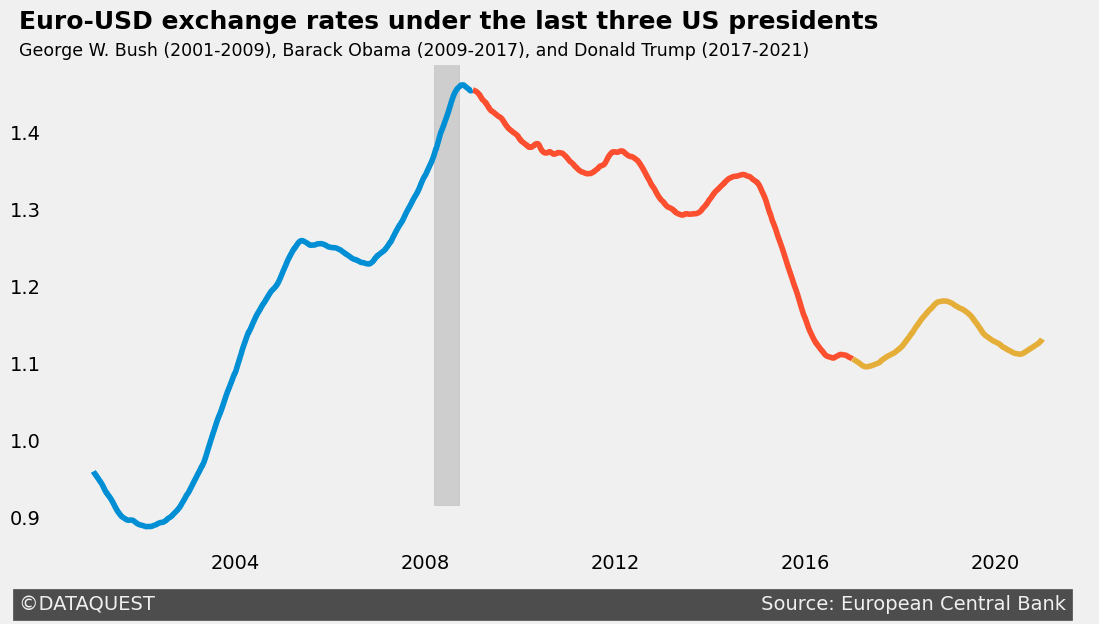

In [10]:
# import `style` module
import matplotlib.style as style

style.use('fivethirtyeight')            # Use `fivethirtyeight` style
fig, ax = plt.subplots(figsize=(12, 6)) # Make the figure object-oriented
                                        # for convenience in programming

# Make the plot based on the data
## Bush + Obama + Trump = Complete Graph
ax.plot(bush['Time'] , bush['rolling_mean_365'])
ax.plot(obama['Time'], obama['rolling_mean_365'])
ax.plot(trump['Time'], trump['rolling_mean_365'])

# Cleaning the `fivethirtyeight` style
ax.grid(False)                          # Clean the grid

# USE: `Axes.axvspan() for highlighting areas of the graph
ax.axvspan(xmin=733112.0, xmax=733302.0, ymin=0.09,
           alpha=0.3, color='grey')


# TEXT FOR INSIGHTS

## NOTE: Adjusting the x-axis is really tricky since
##       in this case the value represents the 5699 data. 
##       So, put small increments first.

## Title
ax.text(729916.0, 1.535, 
        'Euro-USD exchange rates under the last three US presidents', 
        weight='bold', size=18)

## Subtitle
ax.text(729916.0, 1.50, 
        'George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)', 
        size=12.5)

### Adding a signature
ax.text(729916.0, 0.78, '©DATAQUEST' + ' '*97 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()



# Other Ideas (from Dataquest)

## Making it into four graphs

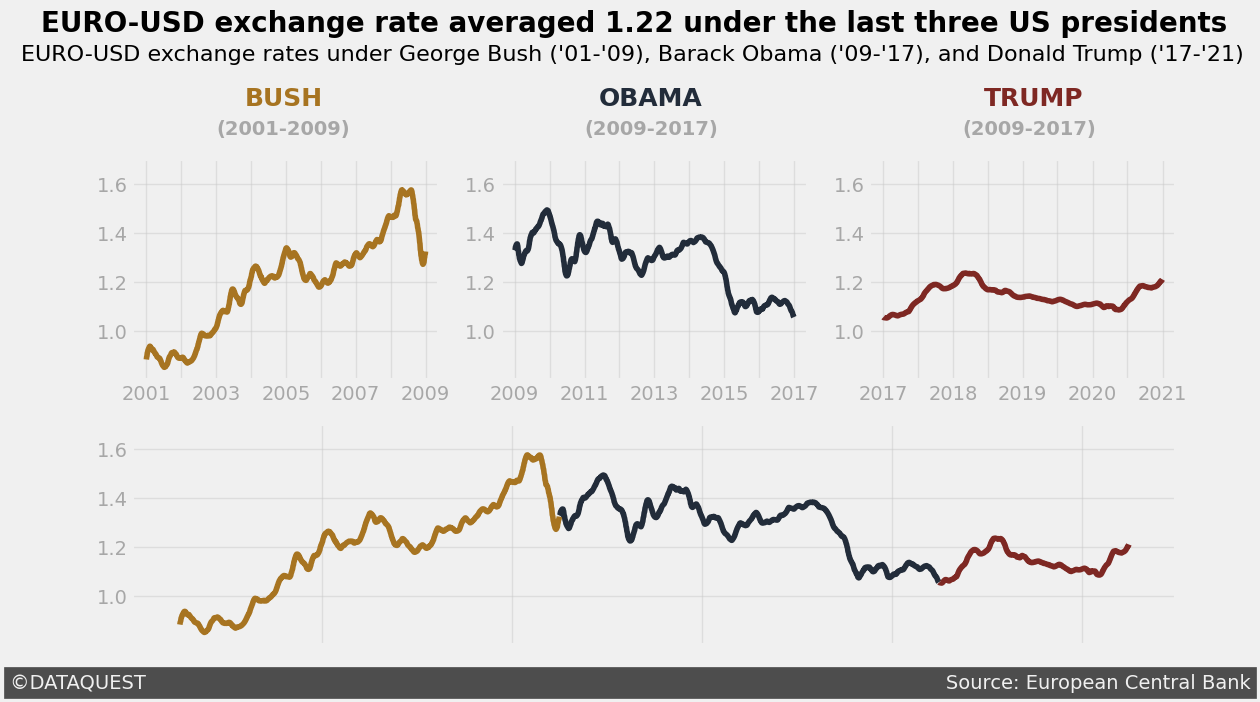

In [49]:
style.use('fivethirtyeight')            # Use `fivethirtyeight` style
  
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 1, 2)
axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels([1.0, 1.2, 1.4, 1.6], alpha=0.3)
    ax.grid(alpha=0.5)
        
# Make the plot based on the data

# ax1: George Bush

## Figure
ax1.plot(bush['Time'] , bush['rolling_mean'], color='#a77421')
ax1.set_xticklabels([' ', '2001', ' ', '2003', ' ', '2005',
                ' ', '2007', ' ', '2009'], alpha=0.3)

## Text
ax1.text(731516.0, 1.92, 'BUSH', fontsize=18,
         weight='bold', color='#a77421')
ax1.text(731216.0, 1.8, '(2001-2009)',
         weight='bold', alpha=0.3)

# ax2: Barack Obama

## Figure

ax2.plot(obama['Time'], obama['rolling_mean'], color='#222c3a')
ax2.set_xticklabels([' ', '2009', ' ', '2011', ' ', '2013',
                ' ', '2015', ' ', '2017'], alpha=0.3)

## Text
ax2.text(734288.0, 1.92, 'OBAMA', fontsize=18,
         weight='bold', color='#222c3a')
ax2.text(734138.0, 1.8, '(2009-2017)',
         weight='bold', alpha=0.3)

# ax3: Donald Trump

## Figure

ax3.plot(trump['Time'], trump['rolling_mean'], color='#7e2823')
ax3.set_xticklabels(['2017', ' ', '2018', ' ', '2019', ' ', 
                     '2020', ' ', '2021'], alpha=0.3)

## Text

ax3.text(736855.0, 1.92, 'TRUMP', fontsize=18,
         weight='bold', color='#7e2823')
ax3.text(736745.0, 1.8, '(2009-2017)',
         weight='bold', alpha=0.3)

# ax4: Bush-Obama-Trump

ax4.plot(bush['Time'] , bush['rolling_mean'], color='#a77421')
ax4.plot(obama['Time'], obama['rolling_mean'], color='#222c3a')
ax4.plot(trump['Time'], trump['rolling_mean'], color='#7e2823')
ax4.set_xticklabels([])

# TEXT FOR INSIGHTS

## Title & Subtitle
ax1.text(729390.0, 2.22, 'EURO-USD exchange rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(729180.0, 2.1, "EURO-USD exchange rates under George Bush ('01-'09), Barack Obama ('09-'17), and Donald Trump ('17-'21)",
         fontsize=16)

# SIGNATURE

ax4.text(729180.0, 0.625, '©DATAQUEST' + ' '*128 + 'Source: European Central Bank',
         color = '#f0f0f0', backgroundcolor = '#4d4d4d', size = 14)

plt.show()